# Pixel by Pixel comparison on common images between matching datasets where the dimension of the images is the same

## Imports

In [2]:
import os
from PIL import Image
import pandas as pd

In [13]:
def pixel_compare(image_path_a, image_path_b):
    try:
        with Image.open(image_path_a) as img_a, Image.open(image_path_b) as img_b:
            if img_a.size != img_b.size:
                return False
            # checking images are in the same mode
            if img_a.mode != img_b.mode:
                img_b = img_b.convert(img_a.mode)
            # comparing pixel data
            return list(img_a.getdata()) == list(img_b.getdata())
    except Exception as e:
        return False

In [14]:
def perform_pixel_comparison(folder_duplicate, folder_original, pair_index, subfolder):
    dir_duplicate = os.path.join(folder_duplicate, subfolder)
    dir_original = os.path.join(folder_original, subfolder)
    
    if not os.path.exists(dir_duplicate) or not os.path.exists(dir_original):
        print(f"Either duplicate or original directory does not exist for subfolder {subfolder}.")
        return
    
    result_desc_safe = f"Pair_{pair_index}_(Duplicate_Data_-_{os.path.basename(folder_duplicate)}_vs_Original_Data_-_{os.path.basename(folder_original)})"
    subfolder_safe = subfolder.replace(" ", "_")
    
    dimensions_csv = f"../data/size_dimension_comparison/all_dimensions_{result_desc_safe}_{subfolder_safe}.csv"
    mismatched_sizes_csv = f"../data/size_dimension_comparison/mismatched_sizes_{result_desc_safe}_{subfolder_safe}.csv"
    
    # checking if CSV files exist
    if not os.path.exists(dimensions_csv):
        print(f"Dimensions CSV file not found: {dimensions_csv}")
        return
    if not os.path.exists(mismatched_sizes_csv):
        print(f"Mismatched sizes CSV file not found: {mismatched_sizes_csv}")
        return

    dimensions_df = pd.read_csv(dimensions_csv)
    mismatched_sizes_df = pd.read_csv(mismatched_sizes_csv)
    
    # finding images with matching dimensions
    dimensions_df["Dimensions Match"] = dimensions_df["Dimension Duplicate"] == dimensions_df["Dimension Original"]
    matching_dimensions_df = dimensions_df[dimensions_df["Dimensions Match"]]
    
    # finding images with mismatched sizes and matching dimensions (we can only compare images pixel by pixel if they have same dimensions)
    # images_to_compare = pd.merge(matching_dimensions_df[["Filename"]], mismatched_sizes_df[["Filename"]], on="Filename")
    
    images_to_compare = matching_dimensions_df[["Filename"]]
    
    print(f"\nPerforming pixel comparison for {result_desc_safe} - {subfolder}:")
    print(f"Number of images to compare: {len(images_to_compare)}")
    
    if images_to_compare.empty:
        print("No images to compare for this subfolder.")
        return
    
    # pixel-by-pixel comparison
    pixel_comparison_results = []
    for index, row in images_to_compare.iterrows():
        filename = row["Filename"]
        image_path_duplicate = os.path.join(dir_duplicate, filename)
        image_path_original = os.path.join(dir_original, filename)
        
        if not os.path.exists(image_path_duplicate):
            print(f"Duplicate image not found: {image_path_duplicate}")
            continue
        if not os.path.exists(image_path_original):
            print(f"Original image not found: {image_path_original}")
            continue
        
        identical = pixel_compare(image_path_duplicate, image_path_original)
        
        pixel_comparison_results.append({
            "Filename": filename,
            "Identical": identical
        })
    
    pixel_comparison_df = pd.DataFrame(pixel_comparison_results)
    
    csv_filename = f"../data/pixel_by_pixel_comparison/pixel_comparison_{result_desc_safe}_{subfolder_safe}.csv"
    pixel_comparison_df.to_csv(csv_filename, index=False)
    
    total_images = len(pixel_comparison_df)
    identical_images = pixel_comparison_df["Identical"].sum()
    different_images = total_images - identical_images
    
    print(f"Total images compared: {total_images}")
    print(f"Identical images: {identical_images}")
    print(f"Different images: {different_images}")

In [15]:
# takes ~115minutes to run

folder_pairs = [
    ("../data/duplicate_data/ISIC-2017-1-FOLD", "../data/original_data/ISIC-2017-Challenge"), 
    ("../data/duplicate_data/ISIC-2018", "../data/original_data/ISIC-2018-Challenge"),
    ("../data/duplicate_data/ISIC-2019-Preprocessed-Dataset", "../data/original_data/ISIC-2019-Challenge")
]
subfolders = ["train", "test", "val"]

for pair_index, (folder_duplicate, folder_original) in enumerate(folder_pairs, start=1):
    for subfolder in subfolders:
        perform_pixel_comparison(folder_duplicate, folder_original, pair_index, subfolder)


Performing pixel comparison for Pair_1_(Duplicate_Data_-_ISIC-2017-1-FOLD_vs_Original_Data_-_ISIC-2017-Challenge) - train:
Number of images to compare: 599
Total images compared: 599
Identical images: 599
Different images: 0

Performing pixel comparison for Pair_1_(Duplicate_Data_-_ISIC-2017-1-FOLD_vs_Original_Data_-_ISIC-2017-Challenge) - test:
Number of images to compare: 61
Total images compared: 61
Identical images: 61
Different images: 0

Performing pixel comparison for Pair_1_(Duplicate_Data_-_ISIC-2017-1-FOLD_vs_Original_Data_-_ISIC-2017-Challenge) - val:
Number of images to compare: 15
Total images compared: 15
Identical images: 15
Different images: 0

Performing pixel comparison for Pair_2_(Duplicate_Data_-_ISIC-2018_vs_Original_Data_-_ISIC-2018-Challenge) - train:
Number of images to compare: 2594
Total images compared: 2594
Identical images: 2594
Different images: 0

Performing pixel comparison for Pair_2_(Duplicate_Data_-_ISIC-2018_vs_Original_Data_-_ISIC-2018-Challenge) -

In [16]:
dimensions_csv = f"../data/size_dimension_comparison/all_dimensions_Pair_3_(Duplicate_Data_-_ISIC-2019-Preprocessed-Dataset_vs_Original_Data_-_ISIC-2019-Challenge)_train.csv"
dimensions_df = pd.read_csv(dimensions_csv)
dimensions_df["Dimensions Match"] = dimensions_df["Dimension Duplicate"] == dimensions_df["Dimension Original"]
matching_dimensions_df = dimensions_df[dimensions_df["Dimensions Match"]]
images_to_compare = matching_dimensions_df[["Filename"]]
images_to_compare

,Filename
0,ISIC_0072077.jpg
1,ISIC_0060158.jpg
2,ISIC_0065968.jpg
3,ISIC_0057391.jpg
4,ISIC_0071807.jpg
...,...
25314,ISIC_0067810.jpg
25316,ISIC_0058993.jpg
25317,ISIC_0064141.jpg
25329,ISIC_0063599.jpg


In [17]:
from pixelmatch.contrib.PIL import pixelmatch
import matplotlib.pyplot as plt

img_a = Image.open("../data/duplicate_data/ISIC-2019-Preprocessed-Dataset/train/ISIC_0072077.jpg")
img_b = Image.open("../data/original_data/ISIC-2019-Challenge/train/ISIC_0072077.jpg")
img_diff = Image.new("RGBA", img_a.size)

mismatch = pixelmatch(img_a, img_b, img_diff, includeAA=True)
 
img_diff.save("diff.png")

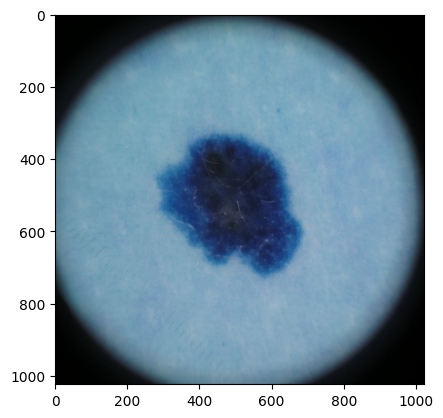

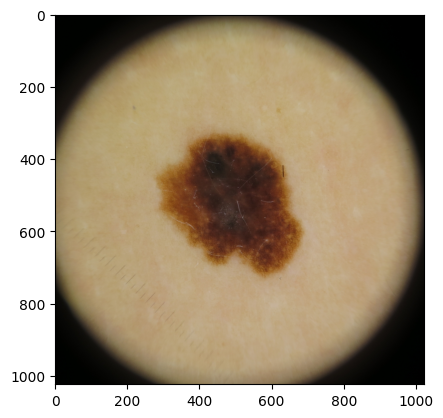

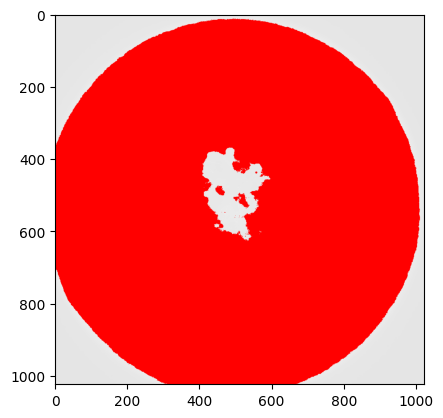

In [18]:
# f, axarr = plt.subplots(2,2)
# axarr[0,0].imshow("../data/duplicate_data/ISIC-2019-Preprocessed-Dataset/train/ISIC_0072077.jpg")
# axarr[0,1].imshow("../data/original_data/ISIC-2019-Challenge/train/ISIC_0072077.jpg")
# axarr[1,0].imshow("diff.png")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ds = mpimg.imread("../data/duplicate_data/ISIC-2019-Preprocessed-Dataset/train/ISIC_0072077.jpg")
plt.figure()
plt.imshow(ds)
big = mpimg.imread("../data/original_data/ISIC-2019-Challenge/train/ISIC_0072077.jpg")
plt.figure()
plt.imshow(big)
diff = mpimg.imread("diff.png")
plt.figure()
plt.imshow(diff)
plt.show()